In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


/home/caue/.local/share/virtualenvs/datasaude-ml-3sD6oy_M/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/caue/.local/share/virtualenvs/datasaude-ml-3sD6oy_M/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/caue/.local/share/virtualenvs/datasaude-ml-3sD6oy_M/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2023-01-01    68.598664
2023-01-02    68.857509
2023-01-03    68.403139
2023-01-04    68.926094
2023-01-05    66.925878
2023-01-06    64.441668
2023-01-07    66.955069
2023-01-08    67.333931
2023-01-09    67.298942
2023-01-10    67.061494
2023-01-11    66.719952
2023-01-12    66.629644
2023-01-13    66.918478
2023-01-14    66.987806
2023-01-15    66.958808
2023-01-16    66.895577
2023-01-17    66.855282
2023-01-18    66.867072
2023-01-19    66.904537
2023-01-20    66.912171
2023-01-21    66.902990
2023-01-22    66.891932
2023-01-23    66.888687
2023-01-24    66.892989
2023-01-25    66.897891
2023-01-26    66.898153
2023-01-27    66.896119
2023-01-28    66.894548
2023-01-29    66.894556
2023-01-30    66.895447
Freq: D, Name: predicted_mean, dtype: float64


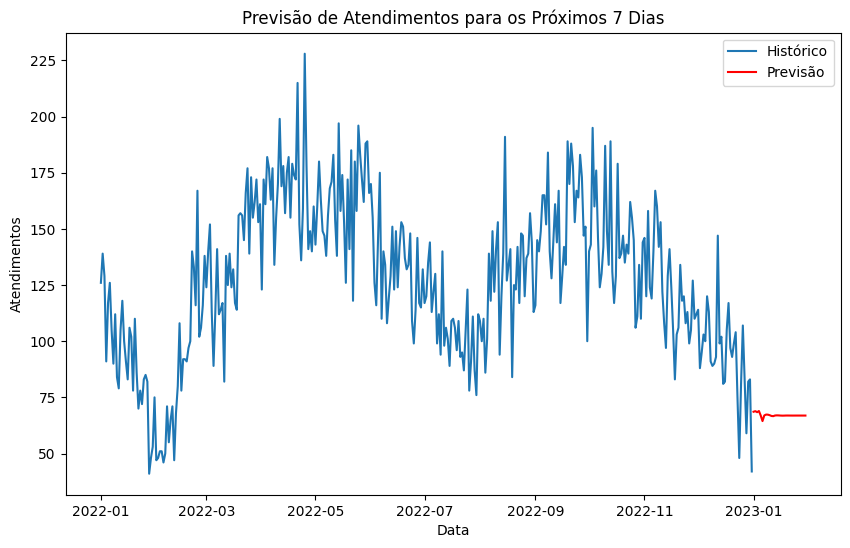

In [3]:
df = pd.read_csv('dados_treino_statsmodel_2022.csv', sep='|')

df['DT_ATENDIMENTO'] = pd.to_datetime(df['DT_ATENDIMENTO'])
df.set_index('DT_ATENDIMENTO', inplace=True)
ts = df['ATENDIMENTOS']

model = ARIMA(ts, order=(5, 1, 0))  # Ordem (p, d, q) pode ser ajustada com base na análise ACF e PACF
model_fit = model.fit()


forecast = model_fit.forecast(steps=30)

print(forecast)

plt.figure(figsize=(10, 6))
plt.plot(ts, label='Histórico')
plt.plot(forecast, label='Previsão', color='red')
plt.legend()
plt.xlabel('Data')
plt.ylabel('Atendimentos')
plt.title('Previsão de Atendimentos para os Próximos 7 Dias')
plt.show()


In [129]:
df.set_index('DT_ATENDIMENTO', inplace=True)

model = sm.tsa.SimpleExpSmoothing(df['ATENDIMENTOS'])
ses_model = model.fit(smoothing_level=0.3)
df['Forecast'] = ses_model.fittedvalues
df.head()
# joblib.dump(logistic_regression, "dados_treino_2022.pkl")

/home/caue/.local/share/virtualenvs/datasaude-ml-3sD6oy_M/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/caue/.local/share/virtualenvs/datasaude-ml-3sD6oy_M/lib/python3.11/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


,ATENDIMENTOS,Forecast
DT_ATENDIMENTO,,
2022-01-01,126,126.000
2022-01-02,139,126.000
2022-01-03,129,129.900
2022-01-04,91,129.630
2022-01-05,117,118.041


In [130]:
# plt.figure(figsize=(10, 6))
# plt.plot(df['ATENDIMENTOS'], label='ATENDIMENTOS', marker='o')
# plt.plot(df['Forecast'], label='Forecast')
# plt.xlabel('DT_ATENDIMENTO')
# plt.ylabel('ATENDIMENTOS')
# plt.title('Exponential Smoothing Forecast')
# plt.legend()
# plt.show()

<Axes: xlabel='DT_ATENDIMENTO'>

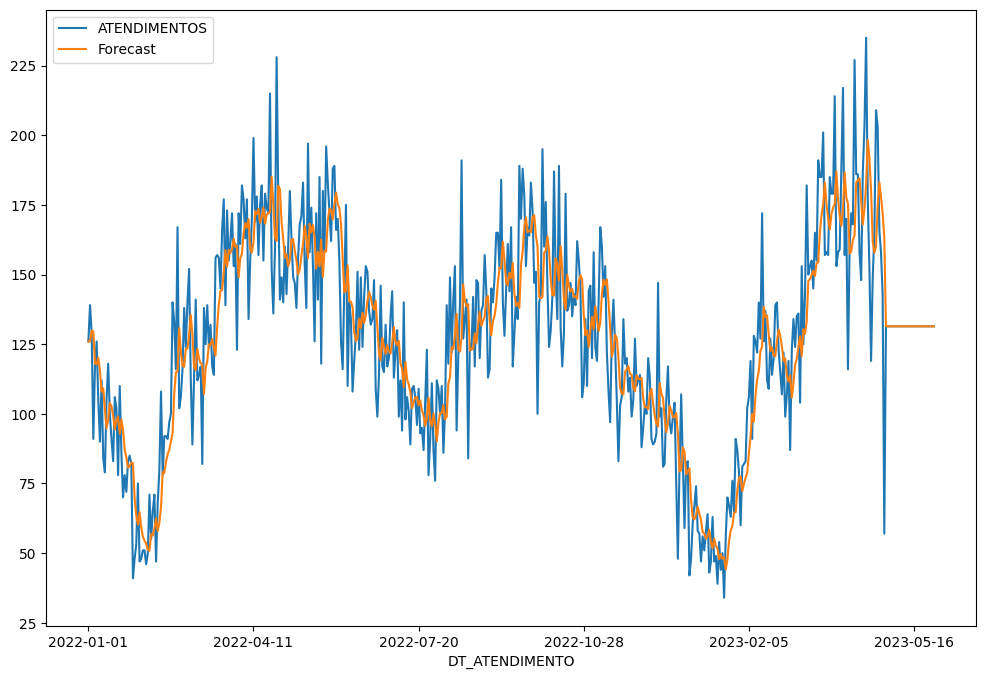

In [131]:
forecast = ses_model.forecast(steps=30)
# print(forecast)
forecast_df = pd.DataFrame({    
    'ATENDIMENTOS': forecast.values,
    'DT_ATENDIMENTO': forecast.index.strftime('%Y-%m-%d'),
    'Forecast': forecast.values
})
forecast_df.set_index('DT_ATENDIMENTO', inplace=True)
# forecast_df.head()
df_plot = pd.concat([df, forecast_df], ignore_index=False)

# df_plot = forecast_df.drop(columns=['Forecast'])
# df_plot.to_csv('temp_file.csv', sep='|', index=True, mode='a', header=False)

df_plot[['ATENDIMENTOS', 'Forecast']].plot(figsize=(12, 8))



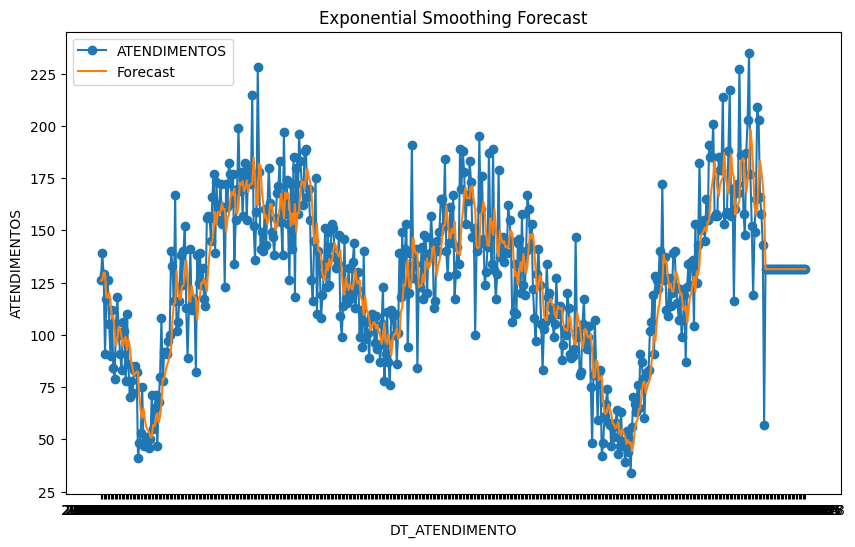

In [132]:
import matplotlib.pyplot as plt



plt.figure(figsize=(10, 6))
plt.plot(df_plot['ATENDIMENTOS'], label='ATENDIMENTOS', marker='o')
plt.plot(df_plot['Forecast'], label='Forecast')
plt.xlabel('DT_ATENDIMENTO')
plt.ylabel('ATENDIMENTOS')
plt.title('Exponential Smoothing Forecast')
plt.legend()
plt.show()